# L3-A - Linear Quantization II: Symmetric vs. Asymmetric Mode

In this lesson, you will learn a different way of performing linear quantization, Symmetric Mode.

The libraries are already installed in the classroom.  If you're running this notebook on your own machine, you can install the following:

```Python
!pip install torch==2.1.1
```

In [1]:
import torch

## Linear Quantization: Symmetric Mode

- Implement a function which returns the `scale` for Linear Quantization in Symmetric Mode.

In [2]:
def get_q_scale_symmetric(tensor, dtype=torch.int8):
    r_max = tensor.abs().max().item()
    q_max = torch.iinfo(dtype).max

    # return the scale
    return r_max/q_max

In [3]:
### test the implementation on a 4x4 matrix
test_tensor = torch.randn((4, 4))

**Note:** Since the values are random, what you see in the video might be different than what you will get.

In [4]:
test_tensor

tensor([[-0.6422, -0.9598,  0.0077,  1.1089],
        [-2.0075,  0.2590, -0.9616,  1.2638],
        [-1.0505, -0.8449,  0.8136,  0.6165],
        [-0.4392,  0.4156,  0.8972,  0.2391]])

In [5]:
test_tensor.max().item()

1.2638087272644043

In [6]:
get_q_scale_symmetric(test_tensor)

0.015807347034844828

- Perform Linear Quantization in Symmetric Mode.
- `linear_q_with_scale_and_zero_point` is the same function you implemented in the previous lesson.

In [7]:
from helper import linear_q_with_scale_and_zero_point

In [8]:
def linear_q_symmetric(tensor, dtype=torch.int8):
    scale = get_q_scale_symmetric(tensor)
    
    quantized_tensor = linear_q_with_scale_and_zero_point(tensor,
                                                     scale=scale,
                   # in symmetric quantization zero point is = 0    
                                                    zero_point=0,
                                                      dtype=dtype)
    
    return quantized_tensor, scale

In [9]:
quantized_tensor, scale = linear_q_symmetric(test_tensor)

### Dequantization

- Perform Dequantization
- Plot the Quantization error.
- `linear_dequantization` is the same function you implemented in the previous lesson.

In [10]:
from helper import linear_dequantization, plot_quantization_errors
from helper import quantization_error

In [11]:
dequantized_tensor = linear_dequantization(quantized_tensor,scale,0)

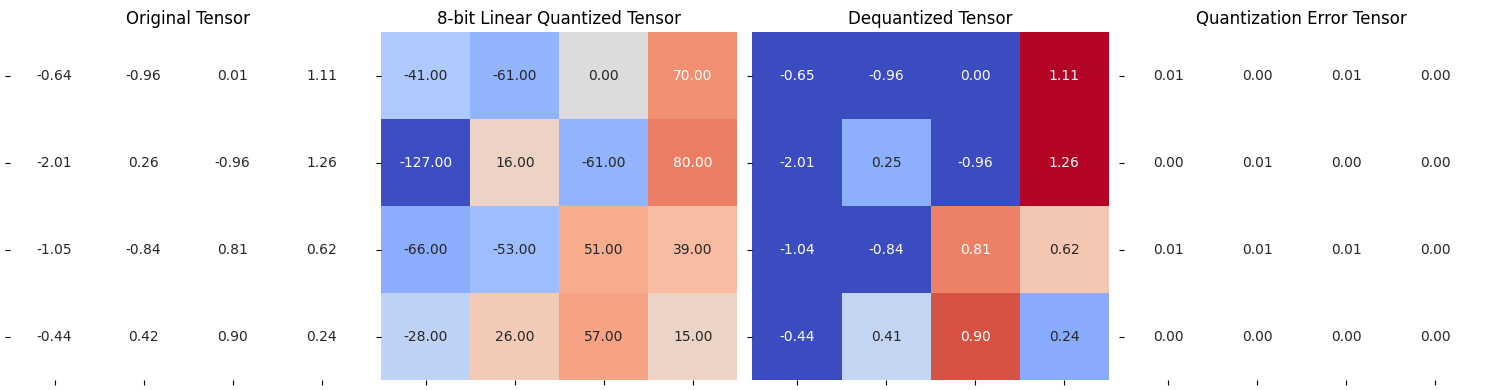

In [12]:
plot_quantization_errors(
    test_tensor, quantized_tensor, dequantized_tensor)

In [13]:
print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor)}""")

Quantization Error : 2.3305790818994865e-05
